In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from time import process_time

For multivariate linear regression our hypothesis is
y_hat = theta_0+ x1*theta_1+ x2*theta2+.....

In [44]:
# Hpothesis for prediction
def h(x, theta):
    return np.dot(x,theta)

In [45]:
# Cost Funnction
def J(X,y,theta):
    m = len(X)
    c = 1/(2*m)
    # Calculate the array of errors
    temp_0 = h(X,theta)-y.reshape(-1)
    temp_1 = temp_0.transpose()
    temp_2 = np.dot(temp_0,temp_1)
    return c*temp_2

In [46]:
# Gradient descent function
def gradient(X,y,theta, alpha):
    m = len(X)
    c = alpha/m
    temp_0 = X.transpose()
    temp_1 = h(X,theta)-y.reshape(-1)
    temp_2 = np.dot(temp_0, temp_1)
    return theta - (c*temp_2)

feature scaling
- Standardization
- mean Normalization
- Min-Max Scaling

In [47]:
# Min-Max Scaling
def normalise(X,columns):
    for column in columns:
        X[column] = (X[column]-X[column].min())/(X[column].max()-X[column].min())
    return X

### Lets Start

In [48]:
# loading the data
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [49]:
df.sample(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
388,389,296,97,2,1.5,2.0,7.80,0,0.49
460,461,319,105,4,4.0,4.5,8.66,1,0.77
424,425,325,114,5,4.0,5.0,9.46,1,0.91


In [50]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

There is no need of serial no and chance of admission in my feature

In [51]:
X = df.drop(['Chance of Admit ','Serial No.'], axis=1)
y = pd.DataFrame(data = df['Chance of Admit ']).to_numpy()

In [52]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [53]:
X.sample(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
28,295,93,1,2.0,2.0,7.20,0
83,322,115,5,4.0,4.5,9.36,1
67,316,107,2,3.5,3.5,8.64,1


In [54]:
# Select columns to be scaled
columns = ['GRE Score', 'TOEFL Score', 'CGPA']
# Min-max scaling
X = normalise(X,columns)
y = y*100

In [55]:
# train, test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.sample(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
172,0.64,0.642857,4,4.0,5.0,0.746795,1
275,0.64,0.642857,3,3.5,3.0,0.692308,1
460,0.58,0.464286,4,4.0,4.5,0.596154,1


In [56]:
### Model training
start = process_time()

m_train=len(X_train)
m_test = len(X_test)
n = len(X_train.axes[1])+1
ones_train=[1]*m_train
ones_test = [1]*m_test

In [57]:
X_train.sample(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,4,4.5,4.5,0.913462,1
293,0.44,0.214286,1,3.5,3.0,0.442308,1
38,0.28,0.464286,1,3.0,1.5,0.224359,0


In [58]:
X_train.insert(0,"X_0", ones_train,True)

In [59]:
X_train.sample(3)

,X_0,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
391,1,0.56,0.500000,3,2.0,3.0,0.592949,0
99,1,0.66,0.750000,3,4.0,4.0,0.666667,1
0,1,0.94,0.928571,4,4.5,4.5,0.913462,1


In [60]:
X_test.insert(0,"X_0",ones_test,True)

In [61]:
X_test.sample(3)

,X_0,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
76,1,0.74,0.714286,3,3.0,3.0,0.615385,1
342,1,0.36,0.500000,3,3.0,3.0,0.461538,0
301,1,0.58,0.571429,2,2.5,3.0,0.628205,0


In [62]:
# Initialization of theta with 0 value
zero_list = [0]*n

In [63]:
zero_list

[0, 0, 0, 0, 0, 0, 0, 0]

In [64]:
theta = np.asarray(zero_list)

In [65]:
theta

array([0, 0, 0, 0, 0, 0, 0, 0])

In [66]:
alpha = 0.005
threshold = 0.1
cost_diff = J(X_train, y_train, theta)
print("initial Cost: {}".format(cost_diff))
my_iter = 0
cost_dict={}
my_key = "I_"+str(my_iter)
cost_dict[my_key] = cost_diff

while cost_diff>=threshold:
    initial_cost = J(X_train,y_train, theta)
    theta = gradient(X_train, y_train, theta, alpha)
    new_cost = J(X_train, y_train, theta)
    cost_diff = initial_cost -new_cost
    my_key = "I_"+str(my_iter)
    cost_dict[my_key] = new_cost
    
    my_iter +=1
    
    print()
    print("Iteration: {}".format(my_iter))
    print("Calculated cost: {}".format(new_cost))
    print("cost difference: {}".format(cost_diff))
    
# Calculate elapsed CPU time
end = process_time()
execution_time = (end - start)*1000

# display theta and cpu execution time of training
print("\nExecution time: {} milliseconds".format(execution_time))
print("\nCalculated\033[1m θ\033[0m: {}".format(theta))

initial Cost: 2741.2200000000003

Iteration: 1
Calculated cost: 1803.536465562745
cost difference: 937.6835344372553

Iteration: 2
Calculated cost: 1194.666514354635
cost difference: 608.86995120811

Iteration: 3
Calculated cost: 799.3013538757673
cost difference: 395.36516047886767

Iteration: 4
Calculated cost: 542.5688457291143
cost difference: 256.732508146653

Iteration: 5
Calculated cost: 375.8531212430477
cost difference: 166.71572448606656

Iteration: 6
Calculated cost: 267.58699480825493
cost difference: 108.2661264347928

Iteration: 7
Calculated cost: 197.27330703026547
cost difference: 70.31368777798946

Iteration: 8
Calculated cost: 151.60287191715722
cost difference: 45.670435113108255

Iteration: 9
Calculated cost: 121.93378796532261
cost difference: 29.669083951834608

Iteration: 10
Calculated cost: 102.6547080814477
cost difference: 19.279079883874914

Iteration: 11
Calculated cost: 90.12208037681452
cost difference: 12.532627704633171

Iteration: 12
Calculated cost: 81

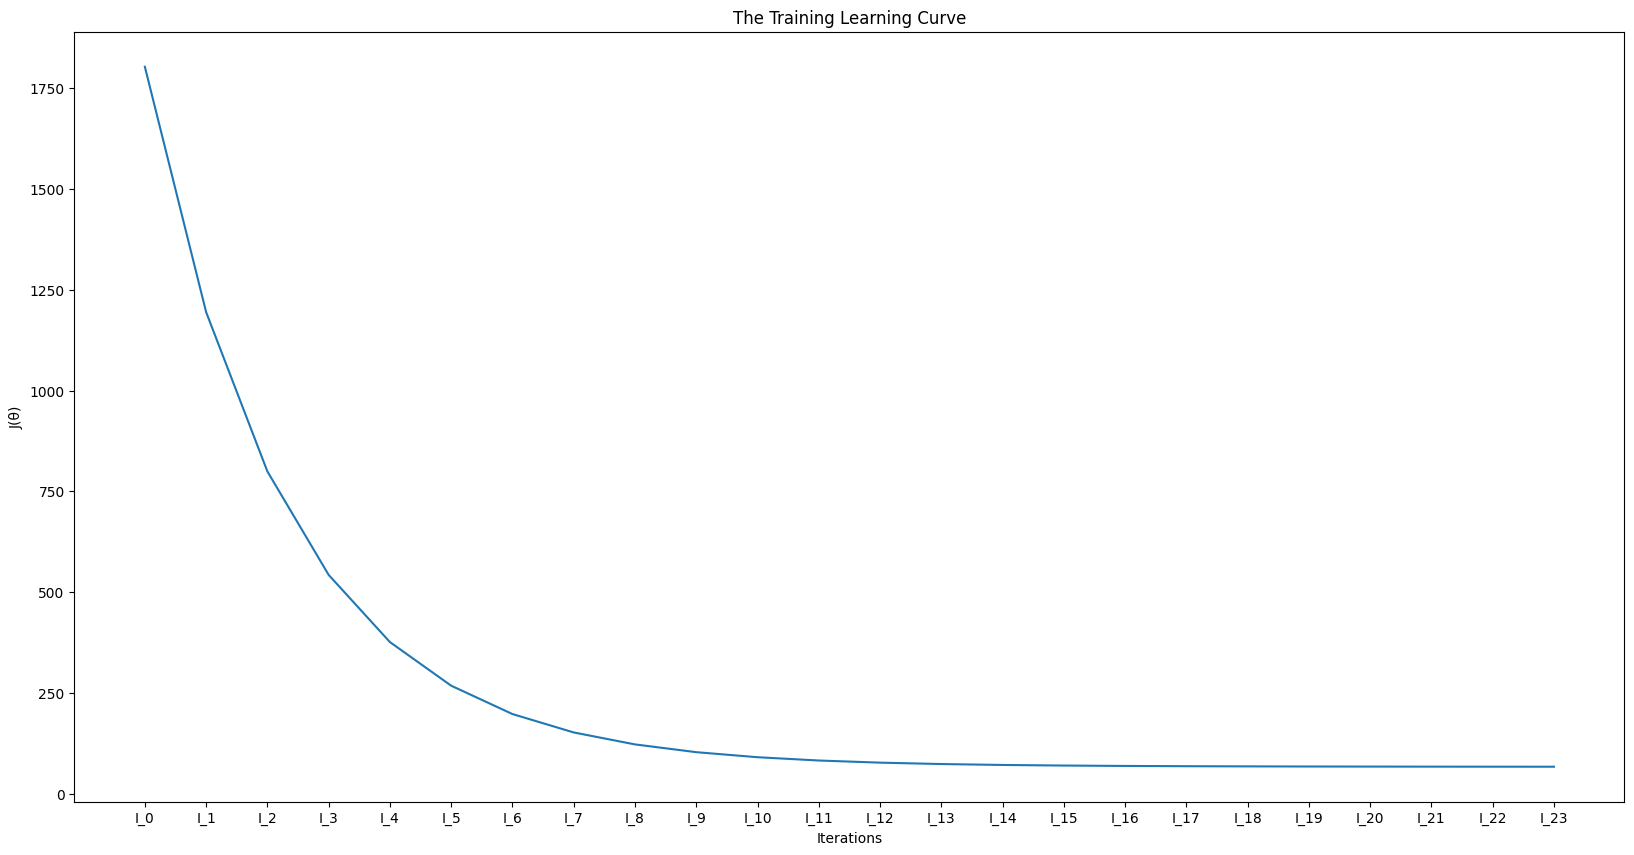

In [67]:
# Plot Training Learning Curve
Y1=[x for x in cost_dict.values()]

X1=[x for x in cost_dict.keys()]

fig = plt.figure(figsize=[20, 10])
plt.xlabel('Iterations')
plt.ylabel('J(θ)')
plt.title('The Training Learning Curve')
plt.plot(X1,Y1, color='tab:blue')

In [69]:
print("\n \033[1m θ\033[0m: {}\n".format(theta))

# calculate the cost value for the test set
cost_test = J(X_test, y_test, theta)
print("Cost of test data: {}".format(cost_test))


  θ: [2.03692557 1.13926025 1.14289218 6.02902784 6.60181418 6.82324225
 1.20521232 1.25048269]

Cost of test data: 76.48149798139414


In [71]:
result = pd.DataFrame(index=X_test.index)
result['Actual CoA'] = y_test
result['Predicted CoA'] = h(X_test, theta)
result.head()

,Actual CoA,Predicted CoA
90,64.0,70.687762
254,85.0,89.177016
283,80.0,60.641830
445,91.0,99.983114
461,68.0,52.698085
